In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import time as t

In [2]:
data_set={'k':[[2,2],[2,4,],[3,3],[4,2]],'r':[[6,7],[7,6],[7,9],[8,7]]}
target_point=[5,6]

<function matplotlib.pyplot.show(*args, **kw)>

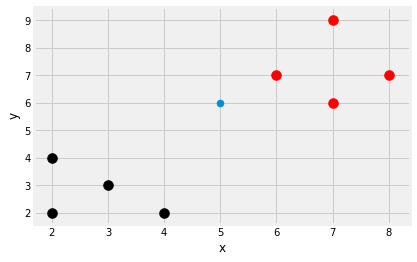

In [3]:
plt.xlabel('x')
plt.ylabel('y')

for i in data_set:
    for ii in data_set[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)
plt.scatter(target_point[0],target_point[1],s=50)
plt.show

In [4]:
def class_counts(data):
    counts={}
    for row in data:
        label=row
        if label not in counts:
            counts[label]=0
        counts[label]+=1
    return counts

In [5]:
class_counts(data_set)

{'k': 1, 'r': 1}

In [6]:
def k_nearest_neighbours(data,predict,k=4):
    dist=[]
    rev={}
    for group in data:
        for features in data[group]:
            distance=np.linalg.norm(np.array(features)-np.array(predict))
            dist.append([distance,group])
    sorted_dist = sorted(dist)        
    votes=[i[1] for i in sorted_dist[:k]]
    uniqueVotes=class_counts(votes)
    for vote in uniqueVotes:
        rev[uniqueVotes[vote]]=vote
    #data[rev[max(rev)]].append(predict)
    return rev[max(rev)]

In [7]:
print (k_nearest_neighbours(data_set,target_point,3))
print (data_set)

r
{'k': [[2, 2], [2, 4], [3, 3], [4, 2]], 'r': [[6, 7], [7, 6], [7, 9], [8, 7]]}


In [8]:
test_set={'r': [[6, 5], [7, 7], [8, 6]], 'k': [[1, 2], [2, 3], [3, 1]]}

In [15]:
def accuracy(k):
    correct=0
    total=0
    for group in test_set:
        for data in test_set[group]:
            vote=k_nearest_neighbours(data_set,target_point,k)
            #print vote , group
            if group==vote:
                correct+=1
                #print correct
            total+=1
    #print ('Accuracy:',correct/float(total))
    return correct/float(total)

In [16]:
listt=[]
for k in range(1,100):
    if k%2!=0:
        start=t.time()
        listt.append([k,accuracy(k)])
        print ('time: ',k,' : ',t.time()-start)
print ('done')

time:  1  :  0.0032744407653808594
time:  3  :  0.0009992122650146484
time:  5  :  0.003968000411987305
time:  7  :  0.0
time:  9  :  0.0040242671966552734
time:  11  :  0.0
time:  13  :  0.0011417865753173828
time:  15  :  0.001626729965209961
time:  17  :  0.0009982585906982422
time:  19  :  0.000985860824584961
time:  21  :  0.0
time:  23  :  0.001985788345336914
time:  25  :  0.0
time:  27  :  0.004688739776611328
time:  29  :  0.0014462471008300781
time:  31  :  0.0016396045684814453
time:  33  :  0.002161741256713867
time:  35  :  0.001993417739868164
time:  37  :  0.0010080337524414062
time:  39  :  0.0
time:  41  :  0.0039408206939697266
time:  43  :  0.0009968280792236328
time:  45  :  0.0
time:  47  :  0.004347801208496094
time:  49  :  0.0009989738464355469
time:  51  :  0.0
time:  53  :  0.004036903381347656
time:  55  :  0.0
time:  57  :  0.004289865493774414
time:  59  :  0.0009918212890625
time:  61  :  0.0019466876983642578
time:  63  :  0.000997304916381836
time:  65  

In [17]:
print(listt)

[[1, 0.5], [3, 0.5], [5, 0.5], [7, 0.5], [9, 0.5], [11, 0.5], [13, 0.5], [15, 0.5], [17, 0.5], [19, 0.5], [21, 0.5], [23, 0.5], [25, 0.5], [27, 0.5], [29, 0.5], [31, 0.5], [33, 0.5], [35, 0.5], [37, 0.5], [39, 0.5], [41, 0.5], [43, 0.5], [45, 0.5], [47, 0.5], [49, 0.5], [51, 0.5], [53, 0.5], [55, 0.5], [57, 0.5], [59, 0.5], [61, 0.5], [63, 0.5], [65, 0.5], [67, 0.5], [69, 0.5], [71, 0.5], [73, 0.5], [75, 0.5], [77, 0.5], [79, 0.5], [81, 0.5], [83, 0.5], [85, 0.5], [87, 0.5], [89, 0.5], [91, 0.5], [93, 0.5], [95, 0.5], [97, 0.5], [99, 0.5]]


In [18]:
accuracy(7)

0.5